# Exercícios de revisão

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

## Seção 2.1

Nos exercícios 1 e 2, use o conjunto de dados, que
representa a razão entre o número de alunos e de
professores em 20 faculdades públicas. (Fonte: Ki-
plinger.)

Dados: 13 15 15 8 16 20 28 19 18 15 21 23 30 17 10 16 15 16 20 15

1. Construa uma distribuição de frequência para o conjun-
to de dados usando cinco classes. Inclua os limites de
classe, pontos médios, fronteiras (limites reais), frequên-
cias, frequências relativas e frequências acumuladas.
2. Construa um histograma de frequência relativa usando
a distribuição de frequência do Exercício 1. Então, de-
termine qual classe tem a maior frequência relativa e
qual tem a menor.

In [2]:
# Secao 2.1

#EXERCICIO 1
data: list[int] = sorted([13, 15, 15, 8, 16, 20, 28, 19, 18, 15, 21, 23, 30, 17, 10, 16, 15, 16, 20, 15])
qtty_bins: int = 5
low_class_limit: int = data[0]
upper_class_limit: int = data[len(data)-1]
class_width: int = math.ceil((upper_class_limit - low_class_limit)/qtty_bins)
bins: [int] = [data[0]+class_width*i for i in range(qtty_bins+1)]
df:pd.DataFrame = pd.DataFrame()

df["Frequency"] = pd.cut(data, bins, right=False, include_lowest=True)

frequency_distribution = df["Frequency"].value_counts().sort_index()
print(f"data: {data},\nbins: {bins}")
frequency_distribution

data: [8, 10, 13, 15, 15, 15, 15, 15, 16, 16, 16, 17, 18, 19, 20, 20, 21, 23, 28, 30],
bins: [8, 13, 18, 23, 28, 33]


Frequency
[8, 13)      2
[13, 18)    10
[18, 23)     5
[23, 28)     1
[28, 33)     2
Name: count, dtype: int64

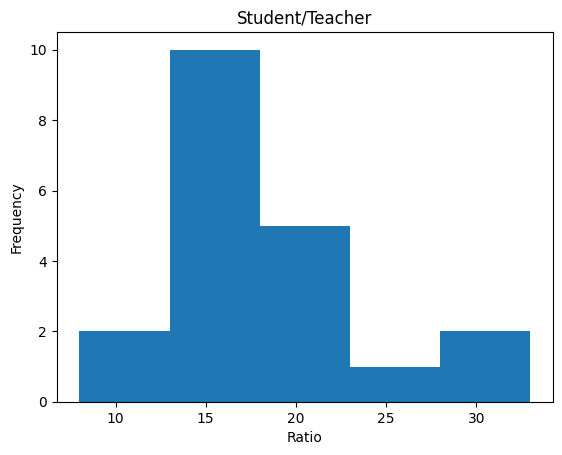

In [3]:
# Secao 2.1

#EXERCICIO 2
frequency_distribution.to_frame()
plt.hist(data, bins=bins)
plt.title("Student/Teacher")
plt.ylabel("Frequency")
plt.xlabel("Ratio")
plt.show()


## Secao 2.2

Nos exercícios 9 e 10, use o conjunto de dados da tabela a
seguir, que representa os resultados de uma pesquisa que
perguntou a adultos americanos onde eles estariam à meia-
-noite na virada do ano. (Adaptado de: Rasmussen Reports.)

dados: (no codigo)

9. Use um gráfico de pizza para exibir o conjunto de dados.
Descreva quaisquer padrões.
10. Use um gráfico de Pareto para exibir o conjunto de da-
dos. Descreva quaisquer padrões.
11. Na tabela a seguir (dados no codigo) estão listadas as alturas (em pés) e o
número de andares de nove edifícios em Houston. Use
um diagrama de dispersão para exibir os dados. Descre-
va quaisquer padrões. (Fonte: Emporis Corporation.)
12. As taxas de desemprego nos Estados Unidos em um
período de 12 anos estão listadas nas tabelas a seguir.
Use um gráfico de série temporal para exibir os dados.
Descreva quaisquer padrões. (Fonte: U.S. Bureau of
Labor Statistics.)

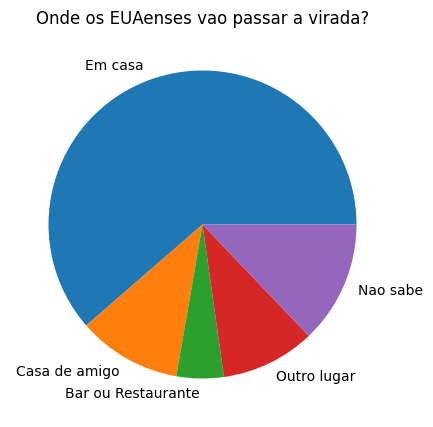

In [4]:
# Secao 2.2

# Exercicios 9
dados: dict[str, list[int|str]] = {
  "Resposta":["Em casa", "Casa de amigo", "Bar ou Restaurante", "Outro lugar", "Nao sabe"],
  "Numero":[620, 110, 50, 100, 130]
}

df = pd.DataFrame(dados)

plt.figure(figsize = (5,5))
plt.title("Onde os EUAenses vao passar a virada?")
plt.pie(df["Numero"], labels = df["Resposta"])
plt.show()

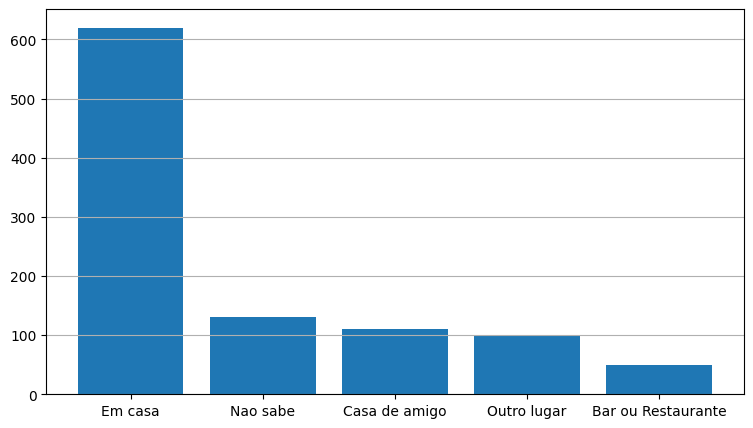

In [5]:
# Secao 2.2

# Exercicio 10

df = df.sort_values(by="Numero", ascending=False)

plt.figure(figsize = (9,5))
plt.grid(axis="y")
plt.bar(df["Resposta"], df["Numero"])
plt.show()

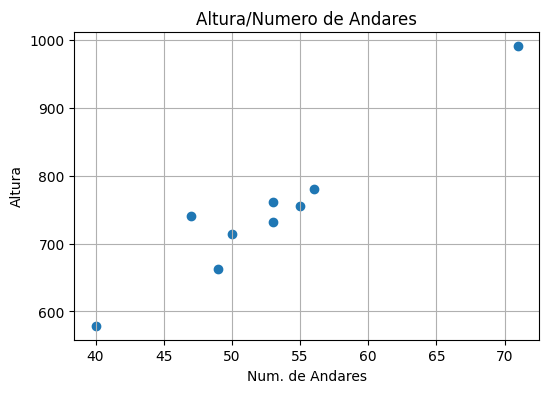

In [6]:
# Secao 2.2
# Exercicio 11

data: dict[str, list[int]] = {
  "Altura":[992, 780, 762, 756, 741, 732, 714, 662, 579],
  "Num. de Andares":[71, 56, 53, 55, 47, 53, 50, 49, 40]
}

df: pd.DataFrame = pd.DataFrame(data)

plt.figure(figsize = (6,4))
plt.scatter(df["Num. de Andares"], df["Altura"])
plt.title("Altura/Numero de Andares")
plt.xlabel("Num. de Andares")
plt.ylabel("Altura")
plt.grid(True)
plt.show()

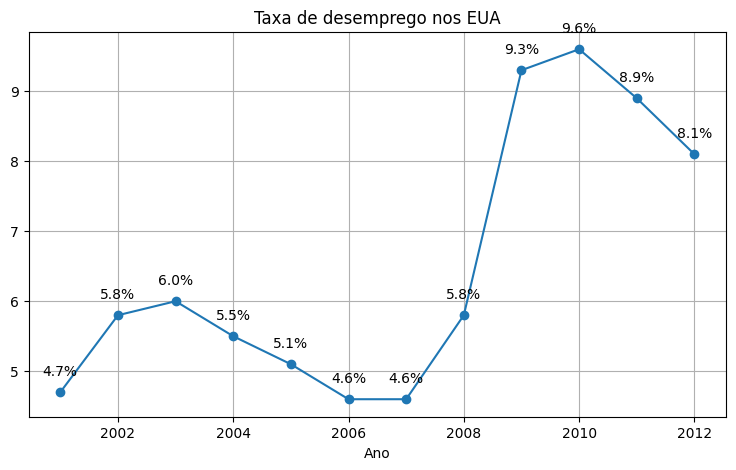

In [7]:
# Secao 2.2
# Exercicio 12

data: dict[str, list[float]] = {
  "Ano": [x for x in range(2001, 2013)],
  "Desemprego": [4.7, 5.8, 6.0, 5.5, 5.1, 4.6, 4.6, 5.8, 9.3, 9.6, 8.9, 8.1]
}

df = pd.DataFrame(data)

plt.figure(figsize = (9,5))
plt.plot(df["Ano"], df["Desemprego"], marker = "o")
plt.title("Taxa de desemprego nos EUA")
plt.xlabel("Ano")

for x,y in zip(df["Ano"], df["Desemprego"]):
  plt.annotate(f"{y}%", xy=(x, y), textcoords="offset points", xytext=(0, 12), ha='center')

plt.grid()

plt.show()


## Seção 2.3
Nos exercícios 13 e 14, encontre a média, a mediana e
a moda dos dados, se possível. Se alguma medida não puder ser encontrada ou não representar o centro da
distribuição, explique o porquê.

13. Os saltos verticais (em polegadas) de uma amostra de
10 jogadores universitários de basquete na seleção da
NBA de 2012. (Fonte: Draft Express.)
Dados: 24,5 29,5 32,5 28,0 28,5 25,5 34,0 24,5 30,0 31,0
14. As respostas de 1.009 adultos que foram indagados se eles
votariam a favor ou contra uma lei que permitiria que
imigrantes ilegais vivendo nos Estados Unidos tivessem a
chance de se tornar residentes legais ou cidadãos, caso aten-
dessem a determinados requisitos. (Adaptado de: Gallup. Dados: A favor: 734
Contra: 255
Não opinaram: 20
18. A distribuição de frequência da tabela a seguir mostra
o número de assinaturas de revistas por domicílio para
uma amostra de 60 domicílios. Encontre o número mé-
dio de assinaturas por domicílio. Dados no codigo

In [8]:
# Secao 2.3
# Exercicios 13

data: list[float] = sorted([24.5, 29.5, 32.5, 28.0, 28.5, 25.5, 34.0, 24.5, 30.0, 31.0])
occurrences: dict[float, int] = {}

for key in data:
  try:
    occurrences[key] = occurrences[key] + 1
  except KeyError:
    occurrences[key] = 1

mean:   float = sum(data) / len(data)
median: float = data[math.ceil(len(data)/2)] if (len(data) % 2 != 0) else ( (data[math.ceil(len(data)/2)] + data[math.ceil(len(data)/2)-1] )/2 )
mode:   float|np.ndarray = max(zip( occurrences.values(), occurrences.keys() ))[1] # np.ndarray just to remove alerts about type attribution problems

print(f"media: {mean},\nmediana: {median},\nmode: {mode}\n")

mean = float(np.mean(data))
median = float(np.median(data))
mode = (stats.mode(data)[0])

print(f"media: {mean},\nmediana: {median},\nmoda: {mode}")

media: 28.8,
mediana: 29.0,
mode: 24.5

media: 28.8,
mediana: 29.0,
moda: 24.5


In [9]:
# Secao 2.3
# Exercicios 14

data: dict[str, int] = {
  "A favor": 734,
  "Contra": 255,
  "Nao opinaram": 20
}

# MEDIA E MEDIANA: IMPOSSIVEL
mode: tuple[int, str] = max(zip( data.values(), data.keys() ))
print(f"{mode[1]}: {mode[0]}")

A favor: 734


In [10]:
# Secao 2.3
# Exercicios 18

data: dict[str, list[int]] = {
  "Num. Revistas": [0, 1, 2, 3, 4, 5, 6],
  "Frequencia": [13, 9, 19, 8, 5, 2, 4]
}

df: pd.DataFrame = pd.DataFrame(data)
df["Total Revistas"] = df["Num. Revistas"] * df["Frequencia"]
mean: float = sum(df["Total Revistas"])/sum(df["Frequencia"])
mean

2.0833333333333335

## Secao 2.4

Nos exercícios 25 e 26, encontre a amplitude, a média, a variância e o desvio padrão da população.

24. As distâncias percorridas (em milhares) para a frota de uma empresa de aluguel de carros.
DADOS: 4 2 9 12 15 3 6 8 1 4 14 12 3 3
25. As idades dos membros da Suprema Corte de Justiça dos Estados Unidos em 8 de fevereiro de 2013. (Fonte: Supreme Court of the United States.)
DADOS: 58 52 76 76 64 79 74 62 58
30. O valor médio da TV via satélite de uma amostra de domicílios era de RS 72,50 por mês com desvio padrão de RS 12,50 por mês. Estime a percentagem de valores de televisão via satélite entre RS 60,00 e RS 85,00. (Admita que o conjunto de dados tem uma distribuição em formato de sino.)
34. A média de vendas por cliente para 40 clientes de um posto de gasolina é de S 36,00, com desvio padrão de S 8,00. Usando o teorema de Chebyshev, determine, no mínimo, quantos clientes gastam entre S 20,00 e S 52,00.
39. Faça um boxplot que represente o conjunto de dados. use o conjunto de dados, que representa a economia de combustível (em milhas na rodovia por galão) de diversas motos Harley-Davidson. (Fonte: Total Motorcycle.)

In [11]:
# SECAO 2.4
# EXERCICIO 25

data: list[int] = sorted([4, 2, 9, 12, 15, 3, 6, 8, 1, 4, 14, 12, 3, 3])

amplitude: int = data[len(data)-1]-data[0]
mean: float = sum(data)/len(data)
variance: float = sum([(x-mean)**2 for x in data])/len(data)
std_dev: float = variance**(1/2)

print(f"\ndata: {data}\namplitude: {amplitude}\nmedia: {mean}\nvariance: {variance}\nstnd_desv: {std_dev}\n")

amplitude = np.max(data) - np.min(data)
mean = float(np.mean(data))
variance = float(np.var(data))
std = np.std(data)

print(f"\ndata: {data}\namplitude: {amplitude}\nmedia: {mean}\nvariance: {variance}\nstnd_desv: {std_dev}\n")


data: [1, 2, 3, 3, 3, 4, 4, 6, 8, 9, 12, 12, 14, 15]
amplitude: 14
media: 6.857142857142857
variance: 21.122448979591837
stnd_desv: 4.5959165548986896


data: [1, 2, 3, 3, 3, 4, 4, 6, 8, 9, 12, 12, 14, 15]
amplitude: 14
media: 6.857142857142857
variance: 21.122448979591837
stnd_desv: 4.5959165548986896



In [12]:
# SECAO 2.4
# EXERCICIO 26

data: list[int] = [58, 52, 76, 76, 64, 79, 74, 62, 58]

amplitude: int = np.max(data) - np.min(data)
mean: float = float(np.mean(data))
variance: float = float(np.var(data))
std_dev: float = float(np.std(data))

print(f"\ndata: {data}\namplitude: {amplitude}\nmedia: {mean}\nvariance: {variance}\nstnd_desv: {std_dev}\n")


data: [58, 52, 76, 76, 64, 79, 74, 62, 58]
amplitude: 27
media: 66.55555555555556
variance: 86.0246913580247
stnd_desv: 9.274949668759648



In [13]:
# SECAO 2.4
# EXERCICIO 30

# PELA REGRA EMPIRICA/TEOREMA DE CHEBYSHEV:
# I - 68% DOS DADOS DENTRO DE 1 DESV. PADRAO DE DISTANCIA DA MEDIA <- O CASO
# II - 95% DOS DADOS DENTRO DE 2 DESV. PADRAO DE DISTANCIA DA MEDIA
# III - 99,8% DOS DADOS DENTRO DE 2 DESV. PADRAO DE DISTANCIA DA MEDIA

# LOGO, A RESPOSTA É 68%

In [14]:
# SECAO 2.4
# EXERCICIO 34

# PELA REGRA EMPIRICA/TEOREMA DE CHEBYSHEV:
# I - 68% DOS DADOS DENTRO DE 1 DESV. PADRAO DE DISTANCIA DA MEDIA
# II - 95% DOS DADOS DENTRO DE 2 DESV. PADRAO DE DISTANCIA DA MEDIA <- O CASO
# III - 99,8% DOS DADOS DENTRO DE 2 DESV. PADRAO DE DISTANCIA DA MEDIA

# LOGO, A RESPOSTA É 95%

median: 53.0, q1: 47.72727272727273, q3*: 55.7


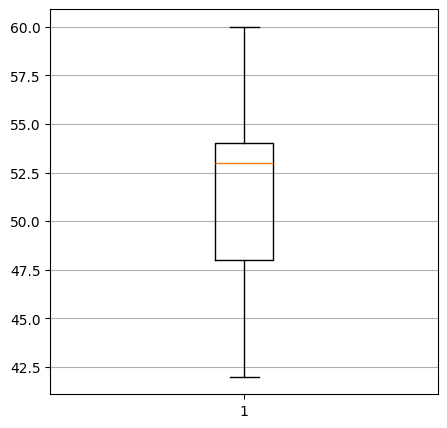

In [57]:
# SECAO 2.5
# EXERCICIO 40



data: list[int] = sorted([53, 57, 60, 57, 54, 53, 54, 53, 54, 42, 48, 53, 47, 47, 50, 48, 42, 42, 54, 54, 60])

median:float = float(np.median(data))
q1:float = float(np.mean(data[:math.ceil(len(data)/2)]))
q3:float = float(np.mean(data[math.ceil(len(data)/2):]))
print(f"median: {median}, q1: {q1}, q3*: {q3}")

plt.figure(figsize = (5,5))
plt.boxplot(data)
plt.grid(True, axis='y')

plt.show()
